### 聚类算法实践
- Kmeans与Dbscan算法
- 半监督问题解决方案
- 聚类评估方法

![title](./img/c1.png)

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### Kmeans

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8],
                         [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples=2000,
                  centers=blob_centers,
                  cluster_std=blob_std,
                  random_state=7)

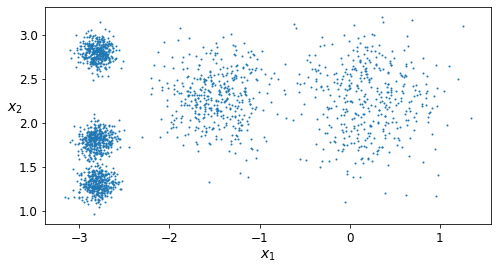

In [35]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 决策边界

In [6]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
# fit_predict(X)与kmeans.labels_ 得到预测结果是一致的

In [7]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [8]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [9]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [11]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [31]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [32]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                marker='o',
                s=30,
                linewidths=8,
                color=circle_color,
                zorder=10,
                alpha=0.9)
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                marker='x',
                s=50,
                linewidths=50,
                color=cross_color,
                zorder=11,
                alpha=1)

In [52]:
def plot_decision_boundaries(clusterer,
                             X,
                             resolution=1000,
                             show_centroids=True,
                             show_xlabels=True,
                             show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    #     print(X.max(axis=0))
    #     print(X.min(axis=0))
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z,
                extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1,
                colors='k')
    plot_data(X)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14)
    else:
        plt.tick_params(labelleft='off')

[1.34442688 3.19903802]
[-3.15343627  0.95843384]


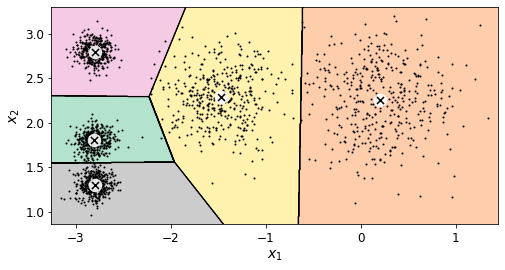

In [49]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [55]:
kmeans_iter1 = KMeans(n_clusters=5,
                      init='random',
                      n_init=1,
                      max_iter=1,
                      random_state=1)
kmeans_iter2 = KMeans(n_clusters=5,
                      init='random',
                      n_init=1,
                      max_iter=2,
                      random_state=1)
kmeans_iter3 = KMeans(n_clusters=5,
                      init='random',
                      n_init=1,
                      max_iter=3,
                      random_state=1)
kmeans_iter4 = KMeans(n_clusters=5,
                      init='random',
                      n_init=1,
                      max_iter=4,
                      random_state=1)
kmeans_iter5 = KMeans(n_clusters=5,
                      init='random',
                      n_init=1,
                      max_iter=5,
                      random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
kmeans_iter4.fit(X)
kmeans_iter5.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=5, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

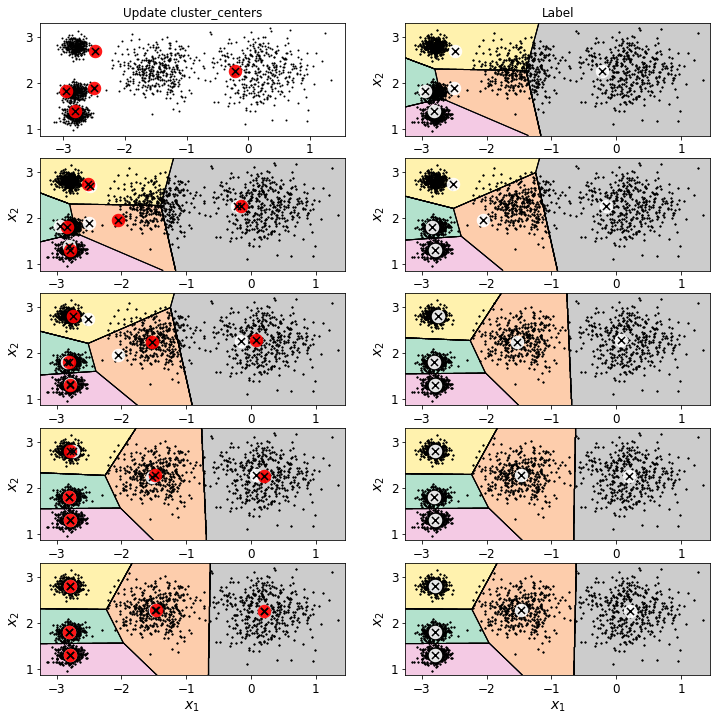

In [57]:
plt.figure(figsize=(12, 12))

plt.subplot(521)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update cluster_centers')

plt.subplot(522)
plot_data(X)
plot_decision_boundaries(kmeans_iter1, X)
plt.title('Label')

plt.subplot(523)
plot_data(X)
plot_decision_boundaries(kmeans_iter1, X)
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='r', cross_color='k')

plt.subplot(524)
plot_data(X)
plot_decision_boundaries(kmeans_iter2, X)

plt.subplot(525)
plot_data(X)
plot_decision_boundaries(kmeans_iter2, X)
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='r', cross_color='k')

plt.subplot(526)
plot_data(X)
plot_decision_boundaries(kmeans_iter3, X)

plt.subplot(527)
plot_data(X)
plot_decision_boundaries(kmeans_iter3, X)
plot_centroids(kmeans_iter4.cluster_centers_, circle_color='r', cross_color='k')

plt.subplot(528)
plot_data(X)
plot_decision_boundaries(kmeans_iter4, X)

plt.subplot(529)
plot_data(X)
plot_decision_boundaries(kmeans_iter4, X)
plot_centroids(kmeans_iter5.cluster_centers_, circle_color='r', cross_color='k')

plt.subplot(5, 2, 10)
plot_data(X)
plot_decision_boundaries(kmeans_iter5, X)

### 不稳定的结果

In [58]:
def plot_clusterer_comparison(c1, c2, X):
    c1.fit(X)
    c2.fit(X)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plot_decision_boundaries(c1, X)
    plt.subplot(122)
    plot_decision_boundaries(c2, X)

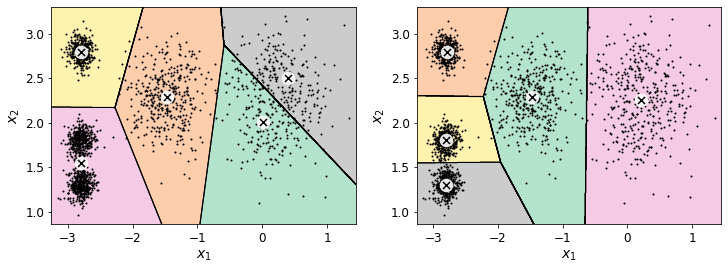

In [59]:
c1 = KMeans(n_clusters=5, init='random', n_init=1, random_state=11)
c2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=12)
plot_clusterer_comparison(c1, c2, X)

### 评估方法
- Inertia指标：每个样本与其质心的距离

In [61]:
kmeans.inertia_

211.5985372581684

In [64]:
# transform得到的是当前样本到每个簇中心距离
X_dist = kmeans.transform(X)

In [67]:
X_dist

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

In [69]:
kmeans.labels_.shape

(2000,)

In [68]:
len(X_dist)

2000

In [72]:
min_dist = X_dist[np.arange(len(X_dist)), kmeans.labels_]
min_dist

array([0.11146795, 0.07122059, 1.32016676, ..., 0.06769209, 0.14895409,
       0.22700281])

In [73]:
np.sum(min_dist**2)

211.59853725816856

In [74]:
kmeans.score(X)

-211.59853725816856

In [75]:
c1.inertia_

223.2910857281904

In [76]:
c2.inertia_

211.5985372581684

In [ ]:
### 找到最佳簇数

In [ ]:
# 如果k值越大，得到的结果肯定会越来越小！！！

In [83]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmean_per_k]

[1, 9, 0, 1300]

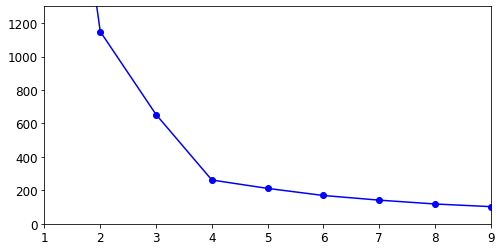

In [84]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, 'bo-')
plt.axis([1, 9, 0, 1300])

### 轮廓系数

- $ai$: 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- $bi$: 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}

![title](./img/c3.png)

结论：
- si接近1，则说明样本i聚类合理；

- si接近-1，则说明样本i更应该分类到另外的簇；

- 若si 近似为0，则说明样本i在两个簇的边界上。

In [85]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [86]:
silhouette_scores = [
    silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]
]

In [87]:
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6070979466596362,
 0.561138795623175,
 0.5667631147874026]

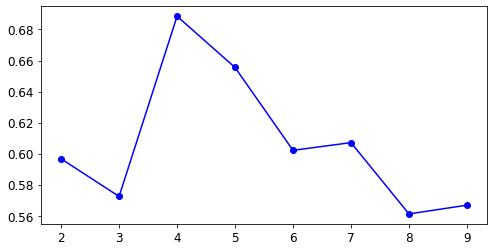

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, 'bo-')

### Kmeans存在的问题

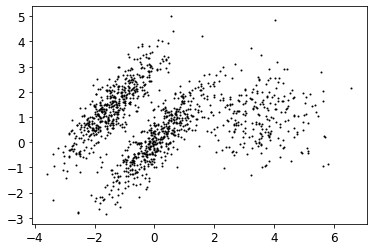

In [91]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_data(X)

In [92]:
kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1,
                     random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Bad - inertia = 2179.4842787447324')

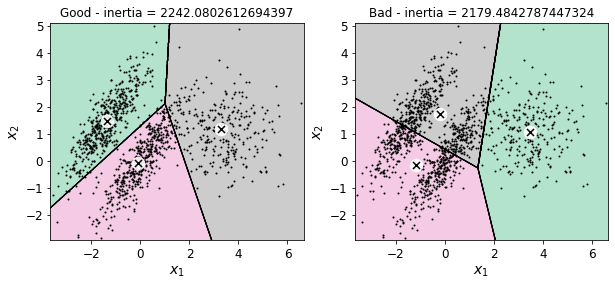

In [93]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title('Good - inertia = {}'.format(kmeans_good.inertia_))

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title('Bad - inertia = {}'.format(kmeans_bad.inertia_))